## Automatic extraction and classification of explicit observational sentences in "Astronomia nova" 
 Gerd Graßhoff$^{(1,2)}$, Mohammad Yeghaneh$^{(2)}$

1: Max-Planck-Institute for the History of Science, Berlin

2: Humboldt University, Berlin

Date: November 2019

In [61]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import utility_01
from utility_01 import *
from sklearn.metrics import roc_curve ,roc_auc_score ,precision_recall_curve,auc,confusion_matrix,classification_report
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import random 
import ipywidgets as widget
from ipywidgets import interact



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [63]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 1000)


## Resources

### Import resources *

In [64]:
# here I have tried citableclass using DOI and It works! after full agreement on the data (part of book) we can use it. Since we can not change it in Zenodo after upload.

In [65]:
df=pd.read_pickle('../data/dfV09A02.pkl');
df=df.sort_index();
df=df.reset_index(drop=True)

Sample of the first sentences of the book in the dataframe format 

In [66]:
df.head()

,Chapter,ParaIndex,SentIndex,Paragraph,Sentence,Entities
0,1,0,0,Chapter 1,Chapter 1,[]
1,1,1,1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.","On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",[]
2,1,2,2,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.",The testimony of the ages confirms that the motions of the planets are orbicular.,[]
3,1,2,3,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.","Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",[]
4,1,2,4,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.","For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",[]


 Sample of the last sentences of the book in the dataframe format 

In [69]:
def observationFilterV02(x):
    list_en=[]
    for idx in range(0,len(x)):
        list_en.append(x[idx][1])
    result= all(lst in list_en for lst in ["COOR","DATE","TIME"])
    if result:
        y="Obs"
    else:
        y="NObs"
    return y

In [70]:
df['Label'] = df['Entities'].apply(lambda x: observationFilterV02(x))

In [71]:
dfObs=df[df.Label=="Obs"]
dfObs=dfObs.reset_index(drop=True)


In [72]:
mapping = {"Obs":1, "NObs":0}
df=df.replace({'Label':mapping});

# Distribution of explicit observational sentences 

here we extract the explicit observational sentences using custom Name Entity Recognition that we provided using deep learning. We can see the sentences in the corresponding paragraph. As you see we integrated data with such contributes as follows:

- **Chapter**
- **ParaIndex**
- **SentIndex** 
- **Paragraph**
- **Sentence** 
- **Entities**
- **Label**

In [73]:
df_obs=df[df.Label==1]

In [74]:
dfChobs=set(df_obs["Chapter"])
dfChobs

{10.0,
 11.0,
 12.0,
 13.0,
 15.0,
 22.0,
 24.0,
 26.0,
 42.0,
 51.0,
 61.0,
 62.0,
 65.0,
 69.0}

# Data preparation for visualization

In [75]:
a=[]
for i in  dfChobs:
    Obch=df_obs[df_obs.Chapter == i].shape[0]
    a.append(Obch)

## Distribution of explicit observational Sentences

Text(0.5, 1.0, 'Distribution of observation over different chapters')

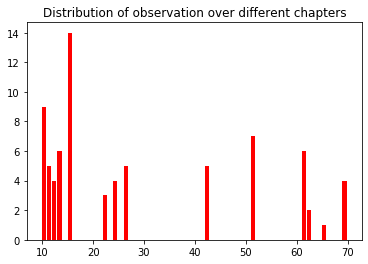

In [76]:
plt.bar(list(dfChobs),a,color="r",align='edge', width=.8)
plt.title("Distribution of observation over different chapters")


In [77]:
X=list(df["Sentence"])
y=np.array(list(df["Label"]))

In [78]:
from collections import Counter
category=Counter(y)
count=dict(category)

In [79]:
count

{0: 6624, 1: 75}

Text(0.5, 1.0, 'Distribution of samples over different classes')

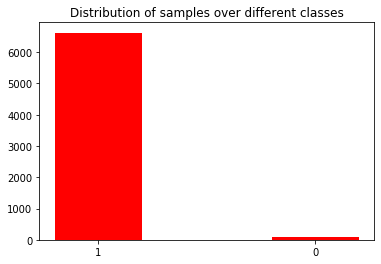

In [80]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")


In [81]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
#from xgboost import XGBClassifier

## Models

In [82]:
vec=TfidfVectorizer()
clf= SGDClassifier()
trial_05=Pipeline([("vect",vec),("clf",clf)])
#####################################################
## 02-XGBClassifier

#trial_02 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     #('clf', XGBClassifier())])


In [83]:
trial_05

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

# Extract explicit observational sentences using custom NER in the paragraph

In [84]:
X_Obs=df.loc[df.Label==1]
X_Obs=X_Obs[["Sentence","Paragraph"]]


In [85]:
def ShowObsPara(a=1):
    return X_Obs.head(a)


In [86]:
interact(ShowObsPara,a=(1,50));

interactive(children=(IntSlider(value=1, description='a', max=50, min=1), Output()), _dom_classes=('widget-int…

In [87]:
Y_Obs=df.loc[df.Label==1]
Y_Obs=Y_Obs.Label
Y_Obs=list(Y_Obs)
NumberObs=len(Y_Obs)

# Non-observational sentences  in the pragraph

In [88]:
X_NObs=df.loc[df.Label==0]
X_NObs=X_NObs[["Sentence","Paragraph"]]

In [89]:
X_NObs.head(10)

,Sentence,Paragraph
0,Chapter 1,Chapter 1
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.","On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality."
2,The testimony of the ages confirms that the motions of the planets are orbicular.,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes."
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.","The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes."
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.","The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes."
5,"However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.","The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes."
6,It is just this from which astronomy arose among humans.,"It is just this from which astronomy arose among humans. Astronomy's aim is considered to be to show why the stars' motions appear to be irregular on earth, despite their being exceedingly well ordered in heaven, and to investigate the specific circles whereby the stars may be moved, so that by their aid the positions and appearances of those stars at any given time may be predicted."
7,"Astronomy's aim is considered to be to show why the stars' motions appear to be irregular on earth, despite their being exceedingly well ordered in heaven, and to investigate the specific circles whereby the stars may be moved, so that by their aid the positions and appearances of those stars at any given time may be predicted.","It is just this from which astronomy arose among humans. Astronomy's aim is considered to be to show why the sta

In [90]:
Y_NObs=df.loc[df.Label==0]
Y_NObs=Y_NObs.Label
Y_NObs=list(Y_NObs)

In [91]:
x_obs = X_Obs.loc[0:, 'Sentence'].values
x_nobs = X_NObs.loc[0:74, 'Sentence'].values


In [92]:
len(x_obs)

75

In [93]:
len(x_nobs)

75

In [94]:
number_of_samples = len(Y_Obs)
Y_NObs=random.sample(Y_NObs,NumberObs);
len(Y_NObs)

75

In [95]:
y=Y_NObs+Y_Obs

In [96]:
X1=x_nobs.tolist()

In [97]:
len(X1)

75

In [98]:
X2=x_obs.tolist()

In [99]:
X=X1+X2

In [100]:
len(X)

150

In [101]:
len(y)

150

# Distribution of Samples  after downsampling

In [102]:
df


,Chapter,ParaIndex,SentIndex,Paragraph,Sentence,Entities,Label
0,1,0,0,Chapter 1,Chapter 1,[],0
1,1,1,1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.","On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",[],0
2,1,2,2,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.",The testimony of the ages confirms that the motions of the planets are orbicular.,[],0
3,1,2,3,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.","Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",[],0
4,1,2,4,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.","For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",[],0
...,...,...,...,...,...,...,...
6694,appendix b,1603,6694,"As shown in Figure 2B, the Sun is assumed to be at the center of the planetary system. The longitudes of Mars and Earth's in reference to the center of the Sun are 198° 21' 30"" and 199° 20' 8"" respectively. The deviation of elongation between Mars and the Earth remain 58' 38"". To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"". Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).","To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"".","[(Mars, PLAN), (opposition, ASTR), (Mars, PLAN), (Earth, PLAN), (Sun, PLAN), (17 hours 20 minutes, TIME), (Mars, PLAN), (eastward, ASTR), (16' 20"", COOR), (Sun, PLAN), (42' 18"", COOR)]",0
6695,appendix b,1603,6695,"As shown in Figure 2B, the Sun is assumed to be at the center of the planetary system. The longitudes of Mars and Earth's in reference to the center of the Sun are 198° 21' 30"" and 199° 20' 8"" respectively. The deviation of elongation between Mars and the Earth remain 58' 38"". To find the position of Mars at opposition, Kepler computed the angular 

In [103]:
category=Counter(y)
count=dict(category)

Text(0.5, 1.0, 'Distribution of samples over different classes')

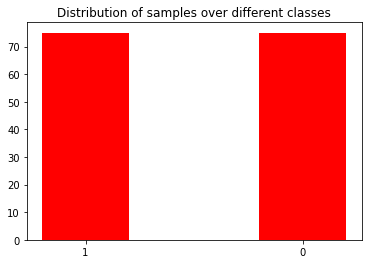

In [104]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")

In [105]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.10, random_state=42)  

# 1- Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
trial_06=Pipeline([("vect",vec),("clf",RF)])
trial_06.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [107]:
cross_validation_accuracy(trial_06,X,y,cv=10)

[0.875      1.         1.         1.         1.         1.
 1.         1.         0.85714286 0.92857143]
Accuracy of : 0.966 ± 0.109


In [108]:
y_pred = cross_val_predict(trial_06, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.96      0.98        75

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [109]:
print(cm)

[[75  3]
 [ 0 72]]


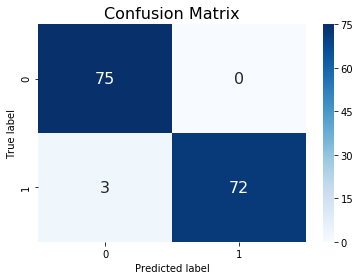

In [110]:
Colorful_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

In [111]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

In [112]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
#auc_score = auc(recall, precision)


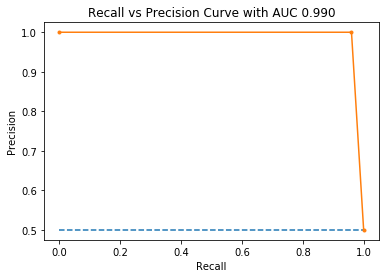

AUC: 0.990


In [113]:
plot_pr(recall, precision)

## 2-SGD

In [114]:
trial_05.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

In [115]:
y_pred=trial_05.predict(X_test)

In [116]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Colorful_Confusion_Matrix(y, y_test, y_pred)


[[9 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [117]:
cross_validation_accuracy(trial_05,X,y,cv=10)

[1.         1.         1.         1.         1.         1.
 0.92857143 1.         1.         0.92857143]
Accuracy of : 0.986 ± 0.057


In [118]:
y_pred = cross_val_predict(trial_05, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.97      1.00      0.99        75

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

[[73  0]
 [ 2 75]]


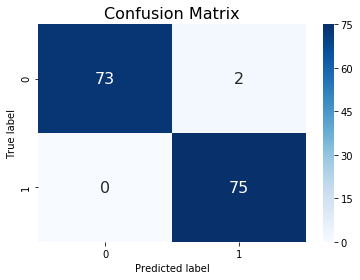

In [119]:
Colorful_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

In [120]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


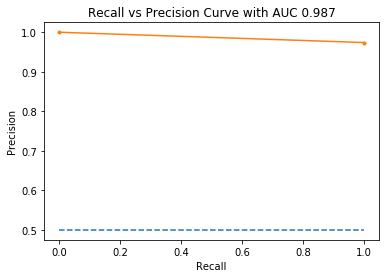

AUC: 0.987


In [121]:
plot_pr(recall, precision)

##  Save the down sampled model

import pickle
saved_model = pickle.dumps(trial_06)

Pkl_Filename = "Pickle_RF_RESAMPLED_Model_02.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(trial_06, file)